## PREDICTING INCOME LEVELS USING MACHINE LEARNING MODELS

#### BUSINESS UNDERSTANDING
Income prediction is a crucial aspect for various stakeholders, including individuals, businesses, and policymakers. Accurate income predictions can help in financial planning, job market analysis, and economic forecasting. For businesses, understanding income levels can assist in targeting the right audience for products and services, optimizing pricing strategies, and improving employee compensation packages. The primary objective of this project is to develop a machine learning model that accurately predicts annual income based on wage per hour and total hours worked per year. The goal is to provide a reliable tool for stakeholders to make informed decisions regarding financial planning, hiring, and economic policies.

### Key Questions:
1. What are the primary factors influencing an individual's annual income?
Analyzing the impact of variables such as wage per hour, total hours worked, education level, and job type.

2. How accurately can we predict annual income using machine learning models?
Evaluating the performance of different machine learning algorithms in predicting income.

3. What insights can be derived from the data regarding employment patterns and income distribution?
Understanding trends and patterns in the data to provide actionable insights.

#### DATA UNDERSTANDING

#### Load the necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
import scipy.stats as stats
#Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import time
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import time
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

#### Load the datasets

In [18]:
#Load the training data
train_df = pd.read_excel("Dataset/Train_Data.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset\\Train_Data.xlsx'

In [ ]:
#Preview the train dataset
train_df.head(5)

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All other   Children or Armed Forces  ...   
2                       Black   All other   Children or Armed Forces  ...   
3   Asian or Pacific Islander   All other   Children or Armed Forces  ...   
4                       White   All other         Not in labor force  ...   

  country_of_birth_mother  migration_code_change_in_msa  \
0                      US                             ?   
1                      US                     unchanged   
2                      US                     unchanged   
3                   India                     unchanged   
4                      US                             ?   

   migration_prev_sunbelt migration_code_move_within_reg  \
0                       ?                              ?   
1                     NaN                      unchanged   
2                     NaN                      unchanged   
3                     NaN                      unchanged   
4                       ?                              ?   

   migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
0                             ?                   NaN               NaN   
1                     unchanged                  Same               NaN   
2                     unchanged                  Same               NaN   
3                     unchanged                  Same               NaN   
4                             ?                   NaN               NaN   

   old_residence_state importance_of_record  income_above_limit  
0                  NaN              1779.74         Below limit  
1                  NaN              2366.75         Below limit  
2                  NaN              1693.42         Below limit  
3                  NaN              1380.27         Below limit  
4                  NaN              1580.79         Below limit  

[5 rows x 43 columns]

In [ ]:
#Load the test dataset
test_df = pd.read_excel("Datasets/Test_Data.xlsx")

In [ ]:
#Preview test data
test_df.head()

ID  age   gender                    education     class  \
0  ID_TZ209499   54     Male         High school graduate   Private   
1  ID_TZ209500   53     Male             5th or 6th grade   Private   
2  ID_TZ209501   42     Male   Bachelors degree(BA AB BS)   Private   
3  ID_TZ209502   16   Female                    9th grade       NaN   
4  ID_TZ209503   16     Male                    9th grade       NaN   

  education_institute                    marital_status    race  \
0                 NaN   Married-civilian spouse present   White   
1                 NaN   Married-civilian spouse present   White   
2                 NaN   Married-civilian spouse present   White   
3         High school                     Never married   White   
4         High school                     Never married   White   

                  is_hispanic      employment_commitment  ...  \
0                   All other   Children or Armed Forces  ...   
1   Central or South American        Full-time schedules  ...   
2                   All other        Full-time schedules  ...   
3                   All other   Children or Armed Forces  ...   
4                   All other         Not in labor force  ...   

  country_of_birth_father  country_of_birth_mother  \
0                      US                       US   
1             El-Salvador              El-Salvador   
2                      US                       US   
3                      US                       US   
4                      US                       US   

   migration_code_change_in_msa migration_prev_sunbelt  \
0                     unchanged                    NaN   
1                             ?                      ?   
2                             ?                      ?   
3                     unchanged                    NaN   
4                             ?                      ?   

   migration_code_move_within_reg  migration_code_change_in_reg  \
0                       unchanged                     unchanged   
1                               ?                             ?   
2                               ?                             ?   
3                       unchanged                     unchanged   
4                               ?                             ?   

  residence_1_year_ago  old_residence_reg old_residence_state  \
0                 Same                NaN                 NaN   
1                  NaN                NaN                 NaN   
2                  NaN                NaN                 NaN   
3                 Same                NaN                 NaN   
4                  NaN                NaN                 NaN   

   importance_of_record  
0               3388.96  
1               1177.55  
2               4898.55  
3               1391.44  
4               1933.18  

[5 rows x 42 columns]

In [ ]:
#Check cell values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [ ]:
#Check for column names
train_df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [ ]:
#Check for duplicates
train_df.duplicated().sum()

np.int64(0)

* This shows there are no duplicates in the dataset

In [ ]:
#Check missing values
train_df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

* This shows there are missing values in the dataset

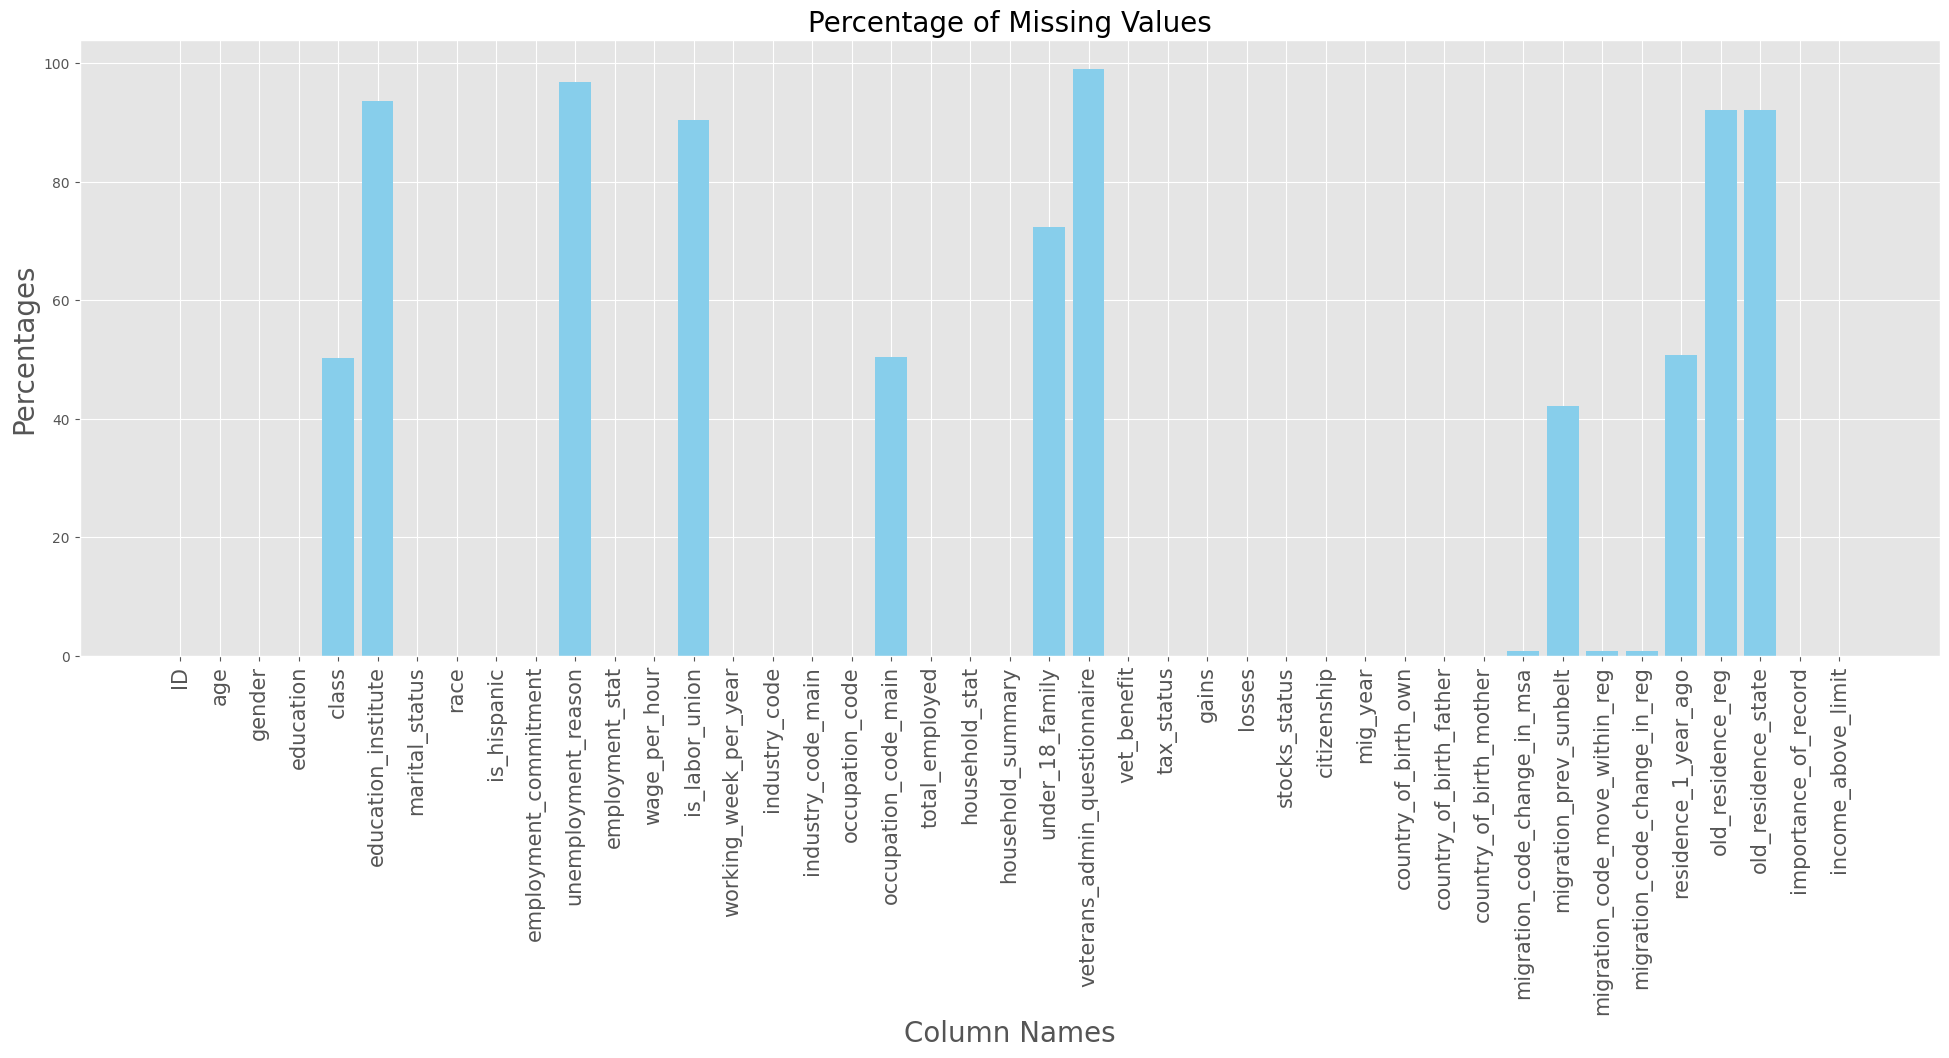

In [ ]:
#Show the percentage of missing values
column_names = train_df.isnull().sum().index
percentage_of_missinginfo = train_df.isnull().sum().values/train_df.shape[0] * 100

with plt.style.context("ggplot"):
    
    plt.figure(figsize=(24,8))
    
    plt.bar(np.arange(len(column_names)),percentage_of_missinginfo,color="skyblue")
    plt.xticks(np.arange(len(column_names)),column_names,rotation=90,fontsize=15)
    plt.xlabel("Column Names",fontsize=20)
    plt.ylabel("Percentages",fontsize=20)
    plt.title("Percentage of Missing Values",fontsize=20)
    plt.show()

In [ ]:
#Check for columns with alot of missing values
columns_to_remove = []
for column in train_df.columns:
    
    rate_missing_info = train_df[column].isnull().sum()/train_df.shape[0] * 100
    
    if rate_missing_info > 40:
        columns_to_remove.append(column)

print("Column with more 40% missing info: \n",columns_to_remove)

Column with more 40% missing info: 
 ['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


##### Analyzing the impact of variables such as wage per hour, education level, and job type on Income Levels

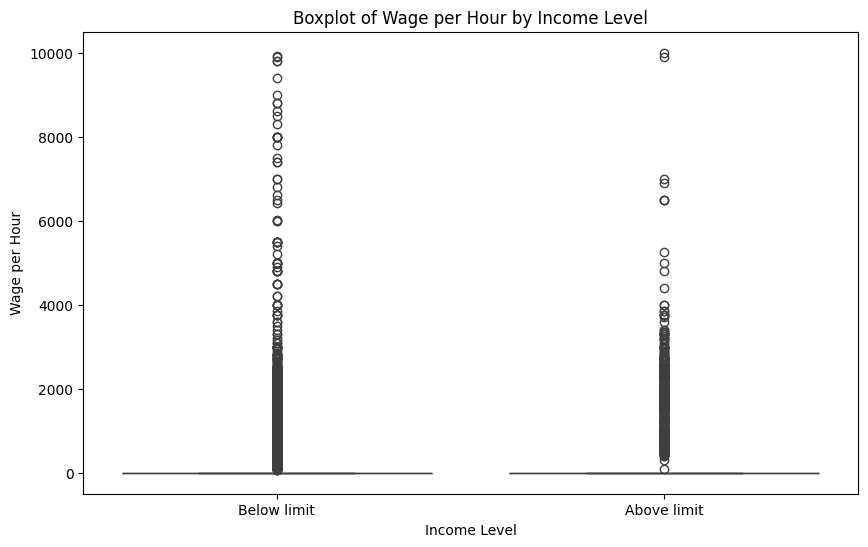

In [ ]:
#visualize how wage_per_hour impacts income levels
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_above_limit', y='wage_per_hour', data=train_df)
plt.title('Boxplot of Wage per Hour by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Wage per Hour')
plt.show()

#### Observation
* The "Below limit" group has a more concentrated distribution of wages, with the majority clustered towards the lower end.

* The "Above limit" group has a wider distribution, with wages spread across a broader range.

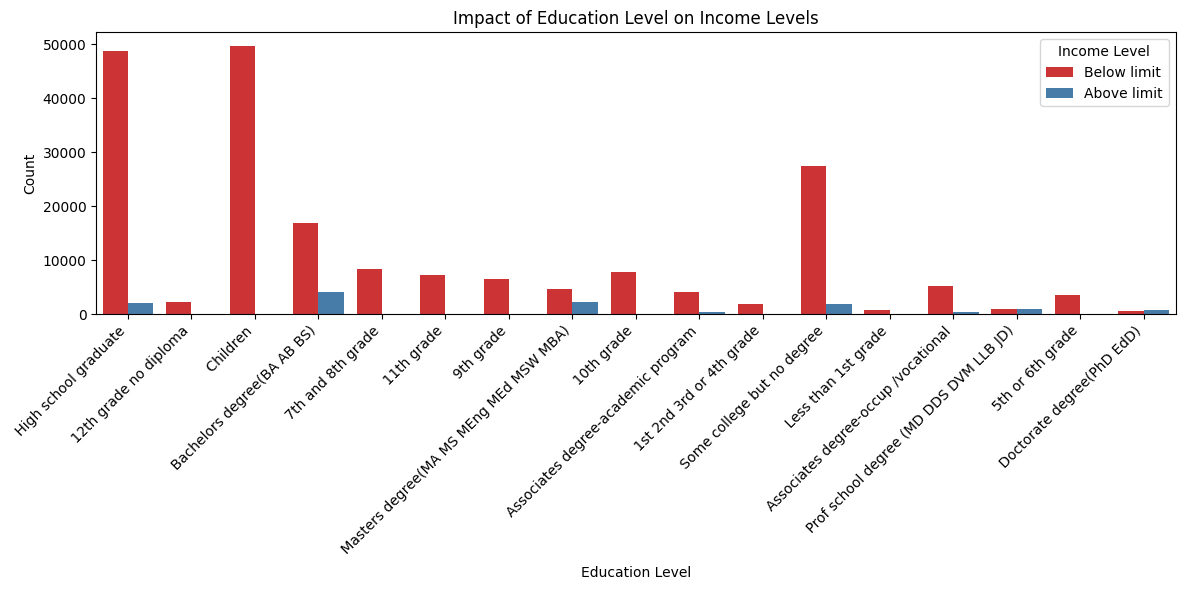

In [ ]:
#visualize how education impacts income levels
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='education', hue='income_above_limit', palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.title('Impact of Education Level on Income Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income Level')
plt.tight_layout()

plt.show()

#### Observation
* The plot suggests a clear trend: higher education levels are generally associated with a greater likelihood of having an income above the limit. 

* Doctoral Degree Variation: While the sample size for doctoral degree holders is small, there seems to be a more even split between the two income categories.

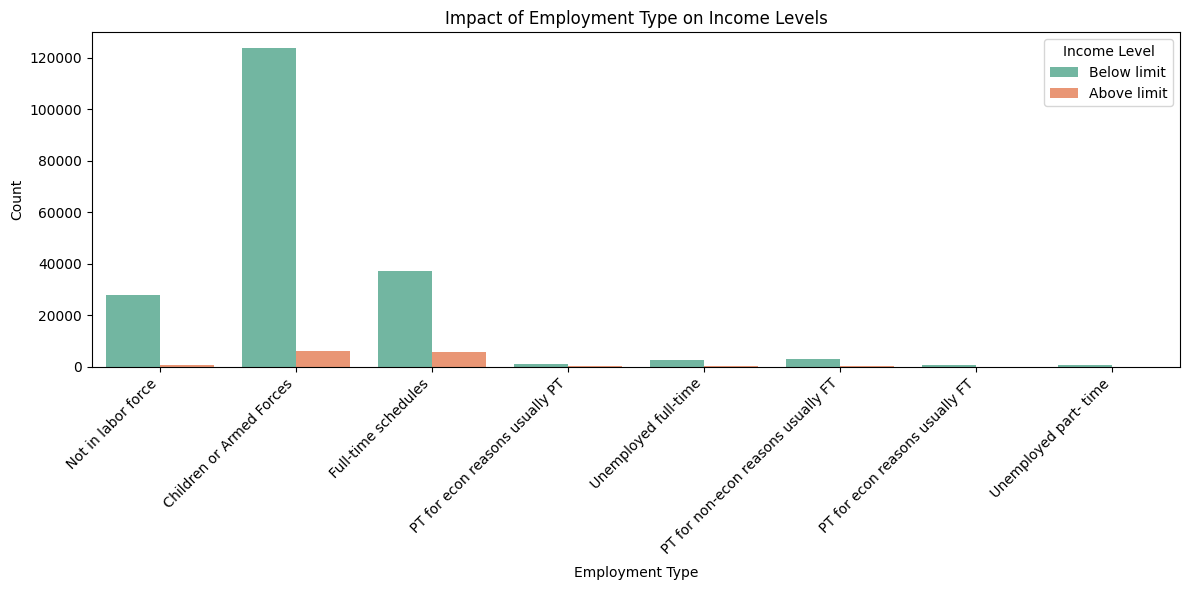

In [ ]:
#visualize how job type impacts income levels
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='employment_commitment', hue='income_above_limit', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Impact of Employment Type on Income Levels')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Income Level')
plt.tight_layout()

plt.show()

#### Visualizing Numerical Features

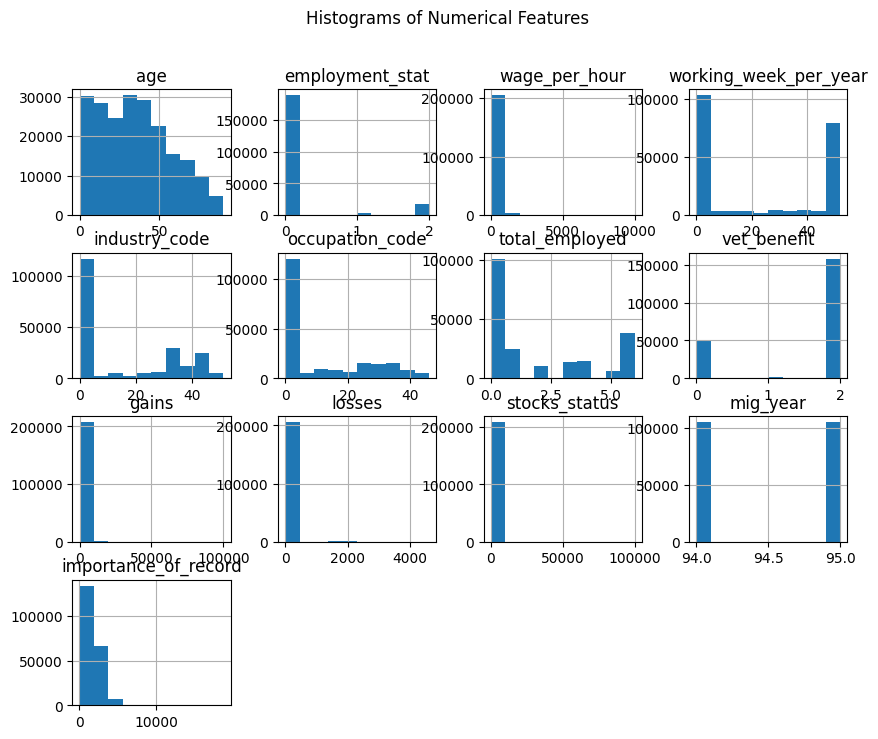

In [ ]:
# Plotting histograms
train_df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

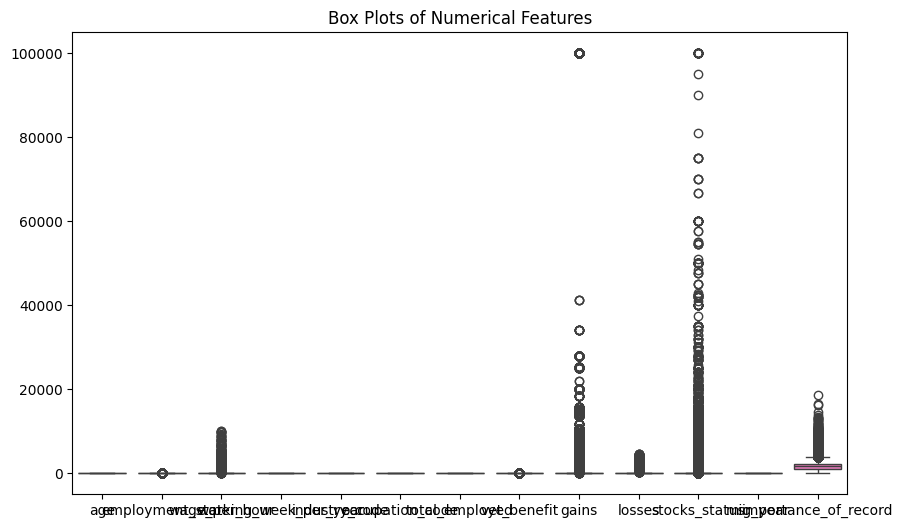

In [ ]:
# Plotting box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df)
plt.title('Box Plots of Numerical Features')
plt.show()

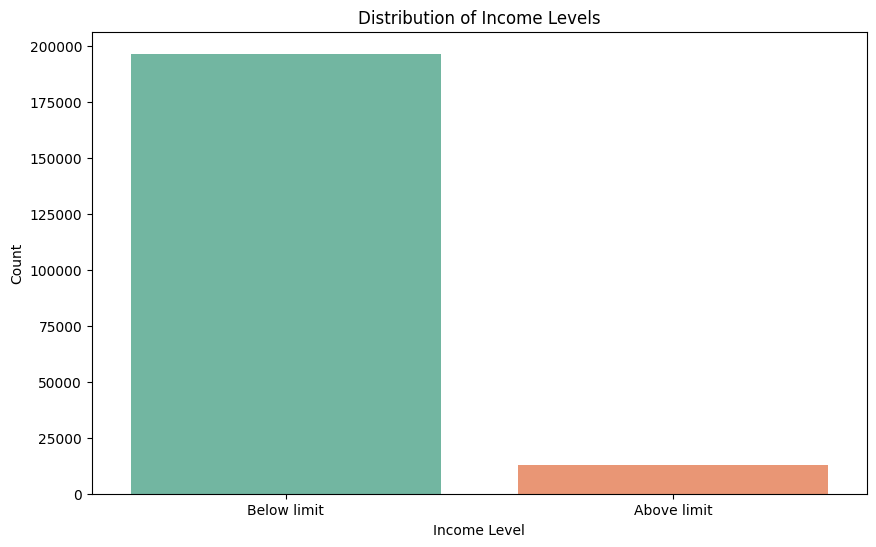

In [ ]:
#Visualizing the Income level column
# Plotting the count plot for 'income_level'
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='income_above_limit', palette='Set2')
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

#### DATA PREPARATION

In [ ]:
#Remove the columns with alot of missing values
df = train_df.drop(columns=columns_to_remove,axis=1)

In [ ]:
#Preview dataframe
df.head()

ID  age   gender               education  \
0  ID_TZ0000   79   Female    High school graduate   
1  ID_TZ0001   65   Female    High school graduate   
2  ID_TZ0002   21     Male   12th grade no diploma   
3  ID_TZ0003    2   Female                Children   
4  ID_TZ0004   70     Male    High school graduate   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  ...  \
0         Not in labor force                0              0  ...   
1   Children or Armed Forces                0              0  ...   
2   Children or Armed Forces                0            500  ...   
3   Children or Armed Forces                0              0  ...   
4         Not in labor force                0              0  ...   

   citizenship  mig_year country_of_birth_own  country_of_birth_father  \
0       Native        95                   US                       US   
1       Native        94                   US                       US   
2       Native        94                   US                       US   
3       Native        94                   US                    India   
4       Native        95                   US                       US   

   country_of_birth_mother migration_code_change_in_msa  \
0                       US                            ?   
1                       US                    unchanged   
2                       US                    unchanged   
3                    India                    unchanged   
4                       US                            ?   

  migration_code_move_within_reg  migration_code_change_in_reg  \
0                              ?                             ?   
1                      unchanged                     unchanged   
2                      unchanged                     unchanged   
3                      unchanged                     unchanged   
4                              ?                             ?   

  importance_of_record  income_above_limit  
0              1779.74         Below limit  
1              2366.75         Below limit  
2              1693.42         Below limit  
3              1380.27         Below limit  
4              1580.79         Below limit  

[5 rows x 32 columns]

##### The ID column will be dropped because it is just an identifier and not useful for prediction.

In [ ]:
#Drop the ID column
df = df.drop(columns=['ID'])

In [ ]:
#Check the value count of the 'country' column
cf_counts = train_df['country_of_birth_father'].unique()
print(cf_counts)

['US' ' India' ' ?' ' Poland' ' Germany' ' El-Salvador' ' Mexico'
 ' Puerto-Rico' ' Philippines' ' Greece' ' Canada' ' Ireland' ' Cambodia'
 ' Ecuador' ' China' ' Hungary' ' Dominican-Republic' ' Japan' ' Italy'
 ' Cuba' ' Peru' ' Jamaica' ' South Korea' ' Yugoslavia' ' Nicaragua'
 ' Columbia' ' Guatemala' ' France' ' England' ' Iran' ' Honduras'
 ' Haiti' ' Trinadad&Tobago' ' Outlying-U S (Guam USVI etc)' ' Thailand'
 ' Vietnam' ' Hong Kong' ' Portugal' ' Laos' ' Scotland' ' Taiwan'
 ' Holand-Netherlands' ' Panama']


In [ ]:
#Check the unique values of the 'country' column
cm_counts = train_df['country_of_birth_mother'].unique()
print(cm_counts)

['US' ' India' ' ?' ' Peru' ' Germany' ' El-Salvador' ' Mexico'
 ' Puerto-Rico' ' Philippines' ' Canada' ' France' ' Cambodia' ' Italy'
 ' Ecuador' ' China' ' Hungary' ' Dominican-Republic' ' Japan' ' England'
 ' Cuba' ' Poland' ' South Korea' ' Yugoslavia' ' Scotland' ' Nicaragua'
 ' Guatemala' ' Holand-Netherlands' ' Greece' ' Ireland' ' Honduras'
 ' Haiti' ' Outlying-U S (Guam USVI etc)' ' Trinadad&Tobago' ' Thailand'
 ' Jamaica' ' Iran' ' Vietnam' ' Columbia' ' Portugal' ' Laos' ' Taiwan'
 ' Hong Kong' ' Panama']


##### These columns country_of_birth_father, and country_of_birth_mother have high cardinality (more than 20 unique values). Since these are categorical variables with high cardinality, we will drop them.

In [ ]:
#Drop the 'country_of_birth_father' and 'country_of_birth_mother' column
df = df.drop(columns=['country_of_birth_father', 'country_of_birth_mother'])

##### This column 'importance_of_record' is likely related to sampling and not the individual hence it will be dropped. 

In [ ]:
#Drop the 'importance_of_record' column
df = df.drop(columns=['importance_of_record'])

In [ ]:
#Preview dataset
df.head()

age   gender               education                    marital_status  \
0   79   Female    High school graduate                           Widowed   
1   65   Female    High school graduate                           Widowed   
2   21     Male   12th grade no diploma                     Never married   
3    2   Female                Children                     Never married   
4   70     Male    High school graduate   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  \
0                       White   All other         Not in labor force   
1                       White   All other   Children or Armed Forces   
2                       Black   All other   Children or Armed Forces   
3   Asian or Pacific Islander   All other   Children or Armed Forces   
4                       White   All other         Not in labor force   

   employment_stat  wage_per_hour  working_week_per_year  ...  gains losses  \
0                0              0                     52  ...      0      0   
1                0              0                      0  ...      0      0   
2                0            500                     15  ...      0      0   
3                0              0                      0  ...      0      0   
4                0              0                      0  ...      0      0   

   stocks_status  citizenship mig_year country_of_birth_own  \
0            292       Native       95                   US   
1              0       Native       94                   US   
2              0       Native       94                   US   
3              0       Native       94                   US   
4              0       Native       95                   US   

   migration_code_change_in_msa migration_code_move_within_reg  \
0                             ?                              ?   
1                     unchanged                      unchanged   
2                     unchanged                      unchanged   
3                     unchanged                      unchanged   
4                             ?                              ?   

   migration_code_change_in_reg  income_above_limit  
0                             ?         Below limit  
1                     unchanged         Below limit  
2                     unchanged         Below limit  
3                     unchanged         Below limit  
4                             ?         Below limit  

[5 rows x 28 columns]

In [ ]:
df.columns

Index(['age', 'gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'total_employed', 'household_stat',
       'household_summary', 'vet_benefit', 'tax_status', 'gains', 'losses',
       'stocks_status', 'citizenship', 'mig_year', 'country_of_birth_own',
       'migration_code_change_in_msa', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'income_above_limit'],
      dtype='object')

In [ ]:
#Check the unique values of the column
emp_counts = train_df['employment_commitment'].unique()
print(emp_counts)

[' Not in labor force' ' Children or Armed Forces' ' Full-time schedules'
 ' PT for econ reasons usually PT' ' Unemployed full-time'
 ' PT for non-econ reasons usually FT' ' PT for econ reasons usually FT'
 ' Unemployed part- time']


In [ ]:
#Check the unique values of the column
emps_counts = train_df['employment_stat'].unique()
print(emps_counts)

[0 2 1]


In [ ]:
#Check the unique values of the  column
occ_counts = train_df['industry_code_main'].unique()
print(occ_counts)

[' Not in universe or children' ' Hospital services' ' Retail trade'
 ' Finance insurance and real estate' ' Manufacturing-nondurable goods'
 ' Transportation' ' Business and repair services'
 ' Medical except hospital' ' Education' ' Construction'
 ' Manufacturing-durable goods' ' Public administration' ' Agriculture'
 ' Other professional services' ' Mining'
 ' Utilities and sanitary services' ' Private household services'
 ' Personal services except private HH' ' Wholesale trade'
 ' Communications' ' Entertainment' ' Social services'
 ' Forestry and fisheries' ' Armed Forces']


In [ ]:
#Check the unique values of the 'occupation_code' column
occ_counts = train_df['mig_year'].unique()
print(occ_counts)

[95 94]


##### Drop Not Needed Columns

In [ ]:
# List of columns to drop
columns_to_drop = [
    'is_hispanic', 'employment_stat', 'industry_code',
    'occupation_code', 'total_employed', 'household_stat', 'household_summary',
    'vet_benefit', 'tax_status', 'stocks_status', 'mig_year',
    'migration_code_change_in_msa', 'migration_code_move_within_reg',
    'migration_code_change_in_reg'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [ ]:
#Preview dataframe
df.head()

age   gender               education                    marital_status  \
0   79   Female    High school graduate                           Widowed   
1   65   Female    High school graduate                           Widowed   
2   21     Male   12th grade no diploma                     Never married   
3    2   Female                Children                     Never married   
4   70     Male    High school graduate   Married-civilian spouse present   

                         race      employment_commitment  wage_per_hour  \
0                       White         Not in labor force              0   
1                       White   Children or Armed Forces              0   
2                       Black   Children or Armed Forces            500   
3   Asian or Pacific Islander   Children or Armed Forces              0   
4                       White         Not in labor force              0   

   working_week_per_year            industry_code_main  gains  losses  \
0                     52   Not in universe or children      0       0   
1                      0   Not in universe or children      0       0   
2                     15             Hospital services      0       0   
3                      0   Not in universe or children      0       0   
4                      0   Not in universe or children      0       0   

  citizenship country_of_birth_own income_above_limit  
0      Native                   US        Below limit  
1      Native                   US        Below limit  
2      Native                   US        Below limit  
3      Native                   US        Below limit  
4      Native                   US        Below limit

##### Rename Columns

In [ ]:
#Rename the columns
df.rename(columns={
    'employment_commitment': 'employment_type',
    'industry_code_main': 'industry',
    'gains': 'capital_gain',
    'losses': 'capital_losses',
    'country_of_birth_own': 'country_of_birth',
    'income_above_limit': 'income_level'
}, inplace=True)

In [ ]:
df.head()

age   gender               education                    marital_status  \
0   79   Female    High school graduate                           Widowed   
1   65   Female    High school graduate                           Widowed   
2   21     Male   12th grade no diploma                     Never married   
3    2   Female                Children                     Never married   
4   70     Male    High school graduate   Married-civilian spouse present   

                         race            employment_type  wage_per_hour  \
0                       White         Not in labor force              0   
1                       White   Children or Armed Forces              0   
2                       Black   Children or Armed Forces            500   
3   Asian or Pacific Islander   Children or Armed Forces              0   
4                       White         Not in labor force              0   

   working_week_per_year                      industry  capital_gain  \
0                     52   Not in universe or children             0   
1                      0   Not in universe or children             0   
2                     15             Hospital services             0   
3                      0   Not in universe or children             0   
4                      0   Not in universe or children             0   

   capital_losses citizenship country_of_birth income_level  
0               0      Native               US  Below limit  
1               0      Native               US  Below limit  
2               0      Native               US  Below limit  
3               0      Native               US  Below limit  
4               0      Native               US  Below limit

In [ ]:
#Remove leading and trailing whitespace in the 'employment_type' column
df['employment_type'] = df['employment_type'].str.strip()

In [ ]:
#Replace values in the 'employment_type' column
df['employment_type'] = df['employment_type'].replace({
    'Children or Armed Forces': 'Children/Armed Forces',
    'Full-time schedules': 'Full time',
    'PT for econ reasons usually PT': 'Part time',
    'Unemployed full-time': 'Unemployed',
    'PT for non-econ reasons usually FT': 'Part time',
    'PT for econ reasons usually FT': 'Part time',
    'Unemployed part- time': 'Unemployed'
})

In [ ]:
df.head()

age   gender               education                    marital_status  \
0   79   Female    High school graduate                           Widowed   
1   65   Female    High school graduate                           Widowed   
2   21     Male   12th grade no diploma                     Never married   
3    2   Female                Children                     Never married   
4   70     Male    High school graduate   Married-civilian spouse present   

                         race        employment_type  wage_per_hour  \
0                       White     Not in labor force              0   
1                       White  Children/Armed Forces              0   
2                       Black  Children/Armed Forces            500   
3   Asian or Pacific Islander  Children/Armed Forces              0   
4                       White     Not in labor force              0   

   working_week_per_year                      industry  capital_gain  \
0                     52   Not in universe or children             0   
1                      0   Not in universe or children             0   
2                     15             Hospital services             0   
3                      0   Not in universe or children             0   
4                      0   Not in universe or children             0   

   capital_losses citizenship country_of_birth income_level  
0               0      Native               US  Below limit  
1               0      Native               US  Below limit  
2               0      Native               US  Below limit  
3               0      Native               US  Below limit  
4               0      Native               US  Below limit

In [ ]:
#Check the unique values of the column
occ = df['employment_type'].unique()
print(occ)

['Not in labor force' 'Children/Armed Forces' 'Full time' 'Part time'
 'Unemployed']


In [ ]:
#Remove leading and trailing whitespace in the 'education' column
df['education'] = df['education'].str.strip()

In [ ]:
# Replace values in the 'education' column
df['education'] = df['education'].replace({
    'High school graduate': 'High_sch_grad',
    '12th grade no diploma': '12th_grade',
    'Bachelors degree(BA AB BS)': 'Bachelors',
    '7th and 8th grade': '7-8th-grade',
    'Masters degree(MA MS MEng MEd MSW MBA)': 'Masters',
    'Associates degree-academic program': 'Assoc-deg-aca',
    '1st 2nd 3rd or 4th grade': '1st-2nd-3rd-4th grad',
    'Some college but no degree': 'Some_college',
    'Associates degree-occup /vocational': 'Assoc-deg-occup-voca',
    'Prof school degree (MD DDS DVM LLB JD)': 'Professional_deg',
    '5th or 6th grade': '5th-6th grade',
    'Doctorate degree(PhD EdD)': 'Doctorate'
})

In [ ]:
#Check the unique values of the column
occ = df['education'].unique()
print(occ)

['High_sch_grad' '12th_grade' 'Children' 'Bachelors' '7-8th-grade'
 '11th grade' '9th grade' 'Masters' '10th grade' 'Assoc-deg-aca'
 '1st-2nd-3rd-4th grad' 'Some_college' 'Less than 1st grade'
 'Assoc-deg-occup-voca' 'Professional_deg' '5th-6th grade' 'Doctorate']


In [ ]:
#Remove leading and trailing whitespace in the column
df['marital_status'] = df['marital_status'].str.strip()

In [ ]:
# Replace values in the 'marital_status' column
df['marital_status'] = df['marital_status'].replace({
    'Married-A F spouse present': 'Married-Armed-Force-Spouse-Present',
    'Married-civilian spouse present': 'Married-Civilian-Spouse-Present',
    'Married-spouse absent': 'Married-Spouse-Absent'
})


In [ ]:
#Check the unique values of the column
occ_counts = df['marital_status'].unique()
print(occ_counts)

['Widowed' 'Never married' 'Married-Civilian-Spouse-Present' 'Divorced'
 'Married-Spouse-Absent' 'Separated' 'Married-Armed-Force-Spouse-Present']


In [ ]:
#Remove leading and trailing whitespace in the column
df['race'] = df['race'].str.strip()

In [ ]:
# Replace values in the 'race' column
df['race'] = df['race'].replace({
    'Asian or Pacific Islander': 'Asian-Pacific-Islander',
    'Amer Indian Aleut or Eskimo': 'Amer-Indian-Eskimo'
})

In [ ]:
#Check the unique values of the column
occ = df['race'].unique()
print(occ)

['White' 'Black' 'Asian-Pacific-Islander' 'Amer-Indian-Eskimo' 'Other']


In [ ]:
#Remove leading and trailing whitespace in the column
df['industry'] = df['industry'].str.strip()

In [ ]:
# Replace values in the 'industry' column
df['industry'] = df['industry'].replace({
    'Not in universe or children': 'Unborn/Children'
})

In [ ]:
#Check the unique values of the column
occ = df['industry'].unique()
print(occ)

['Unborn/Children' 'Hospital services' 'Retail trade'
 'Finance insurance and real estate' 'Manufacturing-nondurable goods'
 'Transportation' 'Business and repair services' 'Medical except hospital'
 'Education' 'Construction' 'Manufacturing-durable goods'
 'Public administration' 'Agriculture' 'Other professional services'
 'Mining' 'Utilities and sanitary services' 'Private household services'
 'Personal services except private HH' 'Wholesale trade' 'Communications'
 'Entertainment' 'Social services' 'Forestry and fisheries' 'Armed Forces']


In [ ]:
#Remove leading and trailing whitespace in the column
df['citizenship'] = df['citizenship'].str.strip()

In [ ]:
#Define the mapping for renaming
rename_mapping = {
    'Foreign born- Not a citizen of U S': 'Non-Citizen',
    'Foreign born- U S citizen by naturalization': 'US citizen by naturalization',
    'Native- Born abroad of American Parent(s)': 'Native- Born abroad',
    'Native- Born in Puerto Rico or U S Outlying': 'Native- Born in Puerto Rico/US Outlying'
}

#Apply the renaming
df['citizenship'] = df['citizenship'].replace(rename_mapping)

In [ ]:
#Check the unique values of the column
occ_counts = df['citizenship'].unique()
print(occ_counts)

['Native' 'Non-Citizen' 'US citizen by naturalization'
 'Native- Born abroad' 'Native- Born in Puerto Rico/US Outlying']


In [ ]:
#Check the unique values of the column
occ_counts = df['country_of_birth'].unique()
print(occ_counts)

['US' ' ?' ' El-Salvador' ' Mexico' ' Philippines' ' Cambodia' ' China'
 ' Hungary' ' Puerto-Rico' ' England' ' Dominican-Republic' ' Japan'
 ' Canada' ' Ecuador' ' Italy' ' Cuba' ' Peru' ' Taiwan' ' South Korea'
 ' Poland' ' Nicaragua' ' Germany' ' Guatemala' ' India' ' Ireland'
 ' Honduras' ' France' ' Trinadad&Tobago' ' Thailand' ' Iran' ' Vietnam'
 ' Portugal' ' Laos' ' Panama' ' Scotland' ' Columbia' ' Jamaica'
 ' Greece' ' Haiti' ' Yugoslavia' ' Outlying-U S (Guam USVI etc)'
 ' Holand-Netherlands' ' Hong Kong']


In [ ]:
#Remove leading and trailing whitespace in the column
df['country_of_birth'] = df['country_of_birth'].str.strip()

In [ ]:
#Replace '?' with 'nan'
df['country_of_birth'] = df['country_of_birth'].replace("?", np.nan)

In [ ]:
#Check the unique values of the column
occ_counts = df['country_of_birth'].unique()
print(occ_counts)

['US' nan 'El-Salvador' 'Mexico' 'Philippines' 'Cambodia' 'China'
 'Hungary' 'Puerto-Rico' 'England' 'Dominican-Republic' 'Japan' 'Canada'
 'Ecuador' 'Italy' 'Cuba' 'Peru' 'Taiwan' 'South Korea' 'Poland'
 'Nicaragua' 'Germany' 'Guatemala' 'India' 'Ireland' 'Honduras' 'France'
 'Trinadad&Tobago' 'Thailand' 'Iran' 'Vietnam' 'Portugal' 'Laos' 'Panama'
 'Scotland' 'Columbia' 'Jamaica' 'Greece' 'Haiti' 'Yugoslavia'
 'Outlying-U S (Guam USVI etc)' 'Holand-Netherlands' 'Hong Kong']


In [ ]:
df.head()

age   gender      education                   marital_status  \
0   79   Female  High_sch_grad                          Widowed   
1   65   Female  High_sch_grad                          Widowed   
2   21     Male     12th_grade                    Never married   
3    2   Female       Children                    Never married   
4   70     Male  High_sch_grad  Married-Civilian-Spouse-Present   

                     race        employment_type  wage_per_hour  \
0                   White     Not in labor force              0   
1                   White  Children/Armed Forces              0   
2                   Black  Children/Armed Forces            500   
3  Asian-Pacific-Islander  Children/Armed Forces              0   
4                   White     Not in labor force              0   

   working_week_per_year           industry  capital_gain  capital_losses  \
0                     52    Unborn/Children             0               0   
1                      0    Unborn/Children             0               0   
2                     15  Hospital services             0               0   
3                      0    Unborn/Children             0               0   
4                      0    Unborn/Children             0               0   

  citizenship country_of_birth income_level  
0      Native               US  Below limit  
1      Native               US  Below limit  
2      Native               US  Below limit  
3      Native               US  Below limit  
4      Native               US  Below limit

In [ ]:
cleaned_data = df.to_csv("dev\Datasets", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\AndyMore\AppData\Local\Temp\ipykernel_18120\1130761174.py:1: SyntaxWarning: invalid escape sequence '\D'
  cleaned_data = df.to_csv("dev\Datasets", index=False)
C:\Users\AndyMore\AppData\Local\Temp\ipykernel_18120\1130761174.py:1: SyntaxWarning: invalid escape sequence '\D'
  cleaned_data = df.to_csv("dev\Datasets", index=False)


NameError: name 'df' is not defined

In [ ]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    209499 non-null  int64 
 1   gender                 209499 non-null  object
 2   education              209499 non-null  object
 3   marital_status         209499 non-null  object
 4   race                   209499 non-null  object
 5   employment_type        209499 non-null  object
 6   wage_per_hour          209499 non-null  int64 
 7   working_week_per_year  209499 non-null  int64 
 8   industry               209499 non-null  object
 9   capital_gain           209499 non-null  int64 
 10  capital_losses         209499 non-null  int64 
 11  citizenship            209499 non-null  object
 12  country_of_birth       205832 non-null  object
 13  income_level           209499 non-null  object
dtypes: int64(5), object(9)
memory usage: 22.4+ MB


* All the columns do not have missing values except for the country_of_birth column.

* All the columns have the right datatype

In [ ]:
df["country_of_birth"].unique()

array(['US', nan, 'El-Salvador', 'Mexico', 'Philippines', 'Cambodia',
       'China', 'Hungary', 'Puerto-Rico', 'England', 'Dominican-Republic',
       'Japan', 'Canada', 'Ecuador', 'Italy', 'Cuba', 'Peru', 'Taiwan',
       'South Korea', 'Poland', 'Nicaragua', 'Germany', 'Guatemala',
       'India', 'Ireland', 'Honduras', 'France', 'Trinadad&Tobago',
       'Thailand', 'Iran', 'Vietnam', 'Portugal', 'Laos', 'Panama',
       'Scotland', 'Columbia', 'Jamaica', 'Greece', 'Haiti', 'Yugoslavia',
       'Outlying-U S (Guam USVI etc)', 'Holand-Netherlands', 'Hong Kong'],
      dtype=object)

In [ ]:
#Replace the nan values with 'Unknown'
df['country_of_birth'] = df['country_of_birth'].fillna('Unknown')

In [ ]:
df["country_of_birth"].unique()

array(['US', 'Unknown', 'El-Salvador', 'Mexico', 'Philippines',
       'Cambodia', 'China', 'Hungary', 'Puerto-Rico', 'England',
       'Dominican-Republic', 'Japan', 'Canada', 'Ecuador', 'Italy',
       'Cuba', 'Peru', 'Taiwan', 'South Korea', 'Poland', 'Nicaragua',
       'Germany', 'Guatemala', 'India', 'Ireland', 'Honduras', 'France',
       'Trinadad&Tobago', 'Thailand', 'Iran', 'Vietnam', 'Portugal',
       'Laos', 'Panama', 'Scotland', 'Columbia', 'Jamaica', 'Greece',
       'Haiti', 'Yugoslavia', 'Outlying-U S (Guam USVI etc)',
       'Holand-Netherlands', 'Hong Kong'], dtype=object)

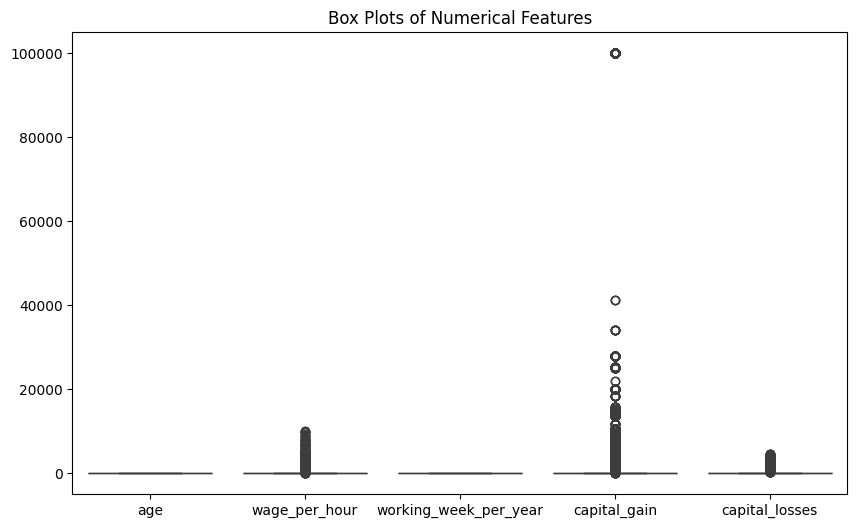

In [ ]:
#Check for Outliers
# Plotting box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Numerical Features')
plt.show()

In [ ]:
#Check summary statistics
df.describe()

age  wage_per_hour  working_week_per_year   capital_gain  \
count  209499.000000  209499.000000          209499.000000  209499.000000   
mean       34.518728      55.433487              23.158850     435.926887   
std        22.306738     276.757327              24.397963    4696.359500   
min         0.000000       0.000000               0.000000       0.000000   
25%        15.000000       0.000000               0.000000       0.000000   
50%        33.000000       0.000000               8.000000       0.000000   
75%        50.000000       0.000000              52.000000       0.000000   
max        90.000000    9999.000000              52.000000   99999.000000   

       capital_losses  
count   209499.000000  
mean        36.881737  
std        270.383302  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max       4608.000000

#### Identifying Outliers
* age: There are no significant outliers here.

* wage_per_hour: The maximum value (9999) is an extreme outlier.

* working_week_per_year: No extreme outliers.

* capital_gain: The maximum value (99999) is an extreme outlier.

* capital_losses: The maximum value (4608) is an extreme outlier.

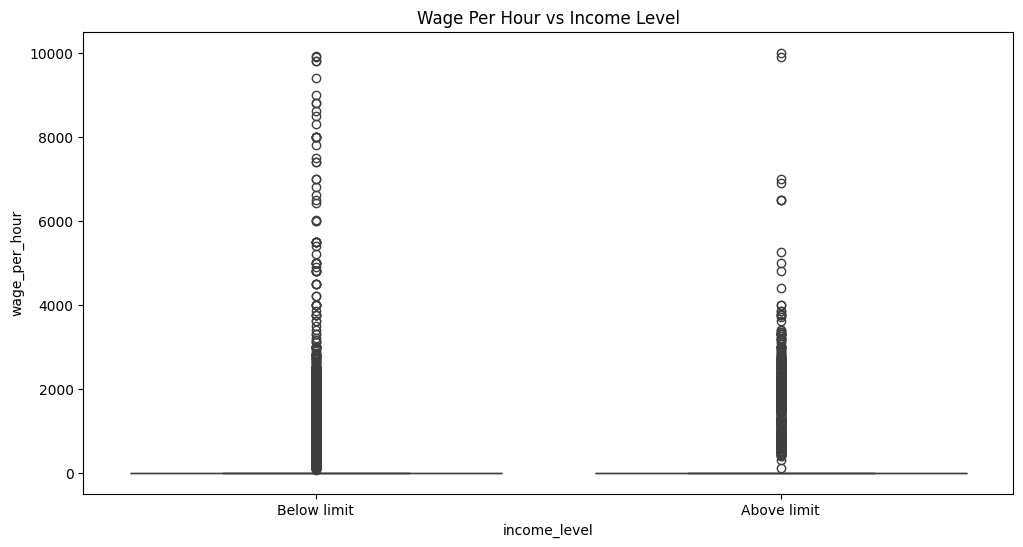

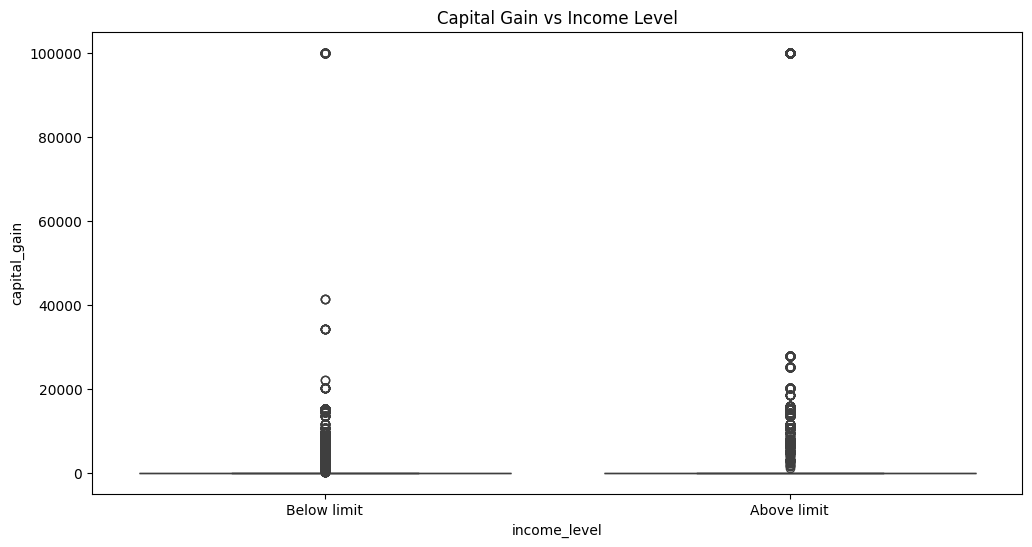

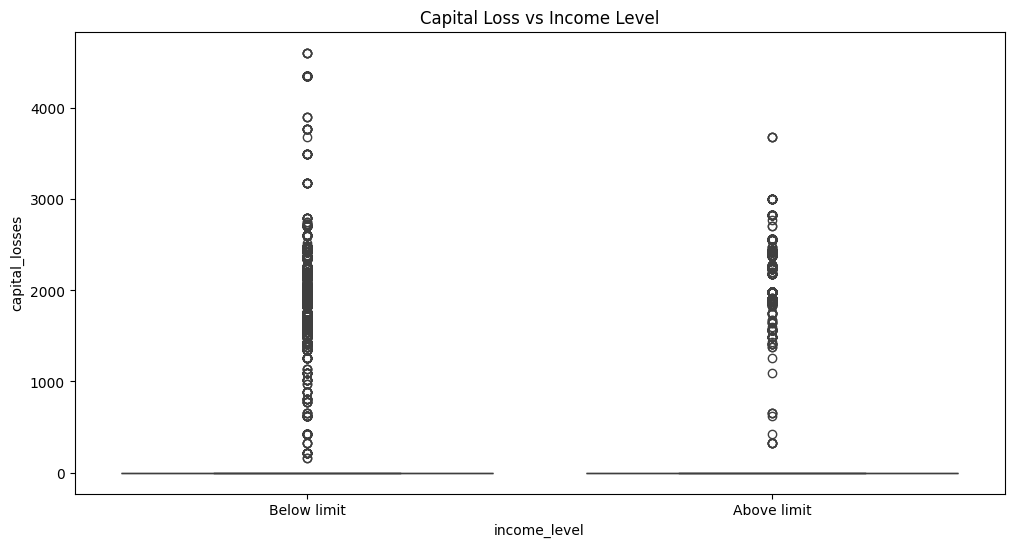

In [ ]:
#Visualize numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='income_level', y='wage_per_hour', data=df)
plt.title('Wage Per Hour vs Income Level')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='income_level', y='capital_gain', data=df)
plt.title('Capital Gain vs Income Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='income_level', y='capital_losses', data=df)
plt.title('Capital Loss vs Income Level')
plt.show()

#### Check if Dataset is Balanced

In [ ]:
#Check dataset Imbalance in target variable(sepsis)
df['income_level'].value_counts()

income_level
Below limit    196501
Above limit     12998
Name: count, dtype: int64

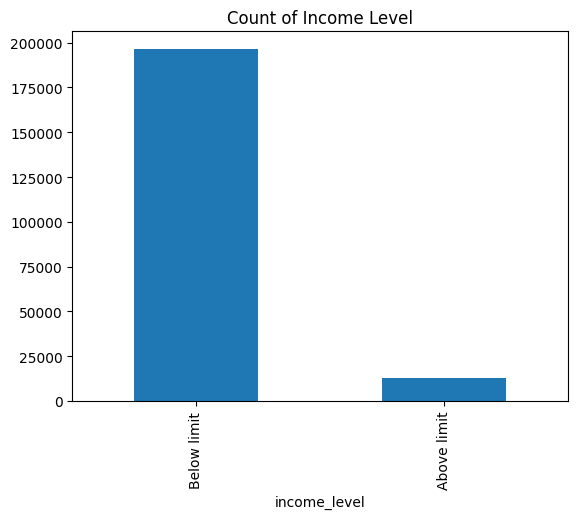

In [ ]:
#Visualize this
df['income_level'].value_counts().plot(kind='bar')
plt.title('Count of Income Level')
plt.show()

##### Interpreting the Chart
* With approximately 94% of the instances in the "Below limit" class and only about 6% in the "Above limit" class, the dataset is highly imbalanced. 

* This can affect the performance of machine learning models, leading them to be biased towards the majority class.

#### MODELING AND EVALUATION

#### Training on the Imbalanced Dataset

In [ ]:
X = df.drop('income_level', axis=1)
y = df['income_level']

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y, random_state=42)

# Sample smaller subset of data
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.20, stratify=y_train, random_state=42)

# Define preprocessor
numeric_features = ['age', 'wage_per_hour', 'working_week_per_year', 'capital_gain', 'capital_losses']
categorical_features = ['gender', 'education', 'marital_status', 'race', 'employment_type', 'country_of_birth']

# Preprocessor for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the models
models = [
    ('logistic_regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('support_vector_classifier', SVC(random_state=42, probability=True)),
    ('random_forest', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('gradient_boost', GradientBoostingClassifier(random_state=42))
]

all_pipelines = {}

# Create a DataFrame for the metrics
metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Train and evaluate each model
for model_name, classifier in models:
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])
    
    # Fit data to pipeline
    pipeline.fit(X_train_sample, y_train_sample)
    all_pipelines[model_name] = pipeline

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Generate classification report for each model
    metrics = classification_report(y_test, y_pred, output_dict=True)
    
    # Evaluate the model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Add metrics to metrics_output
    new_row = pd.DataFrame({
        'model_name': [model_name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1_score]
    })
    
    metrics_output = pd.concat([metrics_output, new_row], ignore_index=True)
    
    end_time = time.time()
    print(f"Model {model_name} trained and evaluated in {end_time - start_time:.2f} seconds")

Model logistic_regression trained and evaluated in 0.98 seconds
Model support_vector_classifier trained and evaluated in 135.07 seconds
Model random_forest trained and evaluated in 9.16 seconds
Model gradient_boost trained and evaluated in 4.97 seconds


In [ ]:
#Display the metrics_output
metrics_output.sort_values(ascending=False, by='f1_score')

model_name  accuracy  precision    recall  f1_score
3             gradient_boost  0.950721   0.942873  0.950721  0.942830
0        logistic_regression  0.947609   0.937960  0.947609  0.938092
2              random_forest  0.941556   0.933533  0.941556  0.936495
1  support_vector_classifier  0.947399   0.938181  0.947399  0.934760

#### Interpretation of Results:
* All models perform quite well, with high accuracy, precision, recall, and F1 scores.

* The Gradient Boosting Classifier has the highest accuracy and recall, making it the most effective model in terms of correctly identifying positive cases.

* Logistic Regression and Support Vector Classifier also perform very well, with very close accuracy and F1 scores.

* Random Forest Classifier has slightly lower performance compared to the other models but still shows strong results.

#### Training on the Balanced Dataset

In [ ]:
# Assuming df is your DataFrame and the target column is 'income_level'
X = df.drop('income_level', axis=1)
y = df['income_level']

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y, random_state=42)

# Sample smaller subset of data
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

# Define preprocessor
numeric_features = ['age', 'wage_per_hour', 'working_week_per_year', 'capital_gain', 'capital_losses']
categorical_features = ['gender', 'education', 'marital_status', 'race', 'employment_type', 'country_of_birth']

# Preprocessor for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the models
models = [
    ('logistic_regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('support_vector_classifier', SVC(random_state=42, probability=True)),
    ('random_forest', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('gradient_boost', GradientBoostingClassifier(random_state=42))
]

all_balanced_pipelines = {}

# Create a DataFrame for the metrics
balanced_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Train and evaluate each model
for model_name, classifier in models:
    start_time = time.time()
    
    # Create pipeline with SMOTE
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])
    
    # Fit data to pipeline
    balanced_pipeline.fit(X_train_sample, y_train_sample)
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Make predictions on the test set
    y_pred = balanced_pipeline.predict(X_test)

    # Generate classification report for each model
    balanced_metrics = classification_report(y_test, y_pred, output_dict=True)
    
    # Evaluate the model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Add metrics to metrics_output
    new_row = pd.DataFrame({
        'model_name': [model_name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1_score]
    })
    
    balanced_metrics_output = pd.concat([balanced_metrics_output, new_row], ignore_index=True)
    
    end_time = time.time()
    print(f"Model {model_name} trained and evaluated in {end_time - start_time:.2f} seconds")


Model logistic_regression trained and evaluated in 1.25 seconds
Model support_vector_classifier trained and evaluated in 255.43 seconds
Model random_forest trained and evaluated in 9.85 seconds
Model gradient_boost trained and evaluated in 6.91 seconds


In [ ]:
#Display the metrics_output
balanced_metrics_output.sort_values(ascending=False, by='f1_score')

model_name  accuracy  precision    recall  f1_score
0        logistic_regression  0.950721   0.942873  0.950721   0.94283
1  support_vector_classifier  0.950721   0.942873  0.950721   0.94283
2              random_forest  0.950721   0.942873  0.950721   0.94283
3             gradient_boost  0.950721   0.942873  0.950721   0.94283

#### Interpretation of Results
* The results show that the models perform identically in terms of accuracy, precision, recall, and F1 score when the dataset is balanced.

* This uniform performance suggests that the process of balancing the dataset using SMOTE effectively mitigates the impact of class imbalance on model performance.

* Given these identical metrics, other factors such as model interpretability, computational efficiency, and ease of deployment should guide the choice of the final model.

#### Save the Best Models

In [ ]:
#Persist the trained pipelines along with label encoder
for model_name, balanced_pipeline in all_balanced_pipelines.items():
    # Save the pipeline object
    joblib.dump(balanced_pipeline, f'./models/{model_name}_pipeline.pkl')

#Save label encoder separately
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']